In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
from fit_util import *
from omega_a_fitting import *
from pileup_correction import *
from lost_muon_calculation import *

### Build the pileup correction for the changing fit threshold clusters 

In [3]:
f = r.TFile("./data/results_truncation_changingFitThreshold_300_100_EndGame.root")

In [4]:
f.cd("clustersAndCoincidencesTrunc")
f.ls()

TFile**		./data/results_truncation_changingFitThreshold_300_100_EndGame.root	
 TFile*		./data/results_truncation_changingFitThreshold_300_100_EndGame.root	
  TDirectoryFile*		clustersAndCoincidencesTrunc	clustersAndCoincidencesTrunc (ClusterAndCoincidenceHistograms) folder
   KEY: TH3I	clusters;1	clusters
   KEY: TH2I	triples;1	triples
   KEY: TH2I	coincidenceTimeDiffs;1	coincidence time differences
   KEY: TH2I	quadruples;1	quadruples
   KEY: TH1I	coincidenceEnergies;1	coincidence energies
   KEY: TH2I	backwardsTriples;1	backwards triples
   KEY: TH2I	backwardsCoincidenceTimeDiffs;1	backwards coincidence time differences
   KEY: TH1I	backwardsCoincidenceEnergies;1	backwards coincidence energies
   KEY: TH1I	ctag;1	ctag
  KEY: TDirectoryFile	clustersAndCoincidences;1	clustersAndCoincidences (ClusterAndCoincidenceHistograms) folder
  KEY: TDirectoryFile	clustersAndCoincidencesTrunc;1	clustersAndCoincidencesTrunc (ClusterAndCoincidenceHistograms) folder
  KEY: TDirectoryFile	clusterCompa

In [5]:
clusters = f.Get("clustersAndCoincidencesTrunc").Get("clusters")
print(clusters)

<ROOT.TH3I object ("clusters") at 0x7fffda0bbe70>


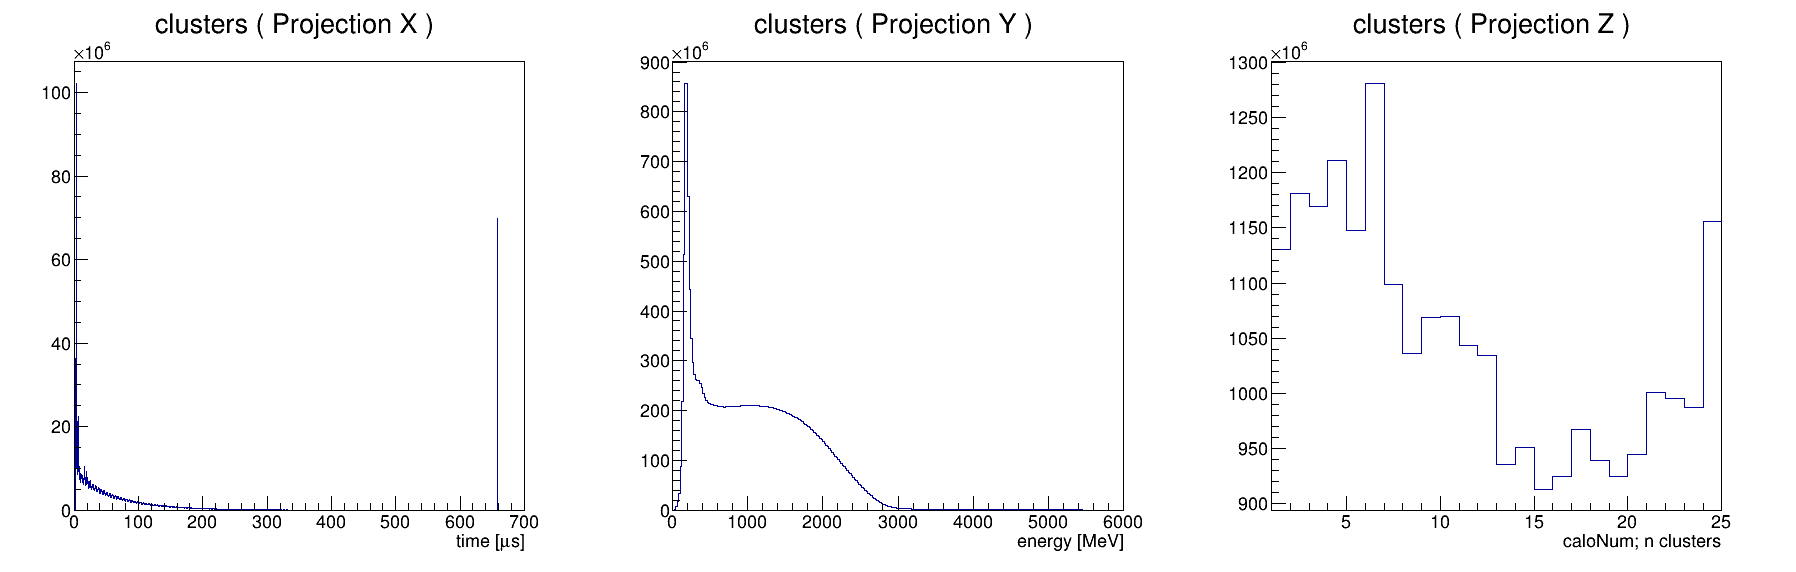

In [6]:
c = r.TCanvas("c","z",1800,600)
c.Divide(3)
c.cd(1)
clusters.ProjectionX().Draw()
c.cd(2)
clusters.ProjectionY().Draw()
c.cd(3)
clusters.ProjectionZ().Draw()
c.Draw()

---
# Make the pileup correction from this histogram

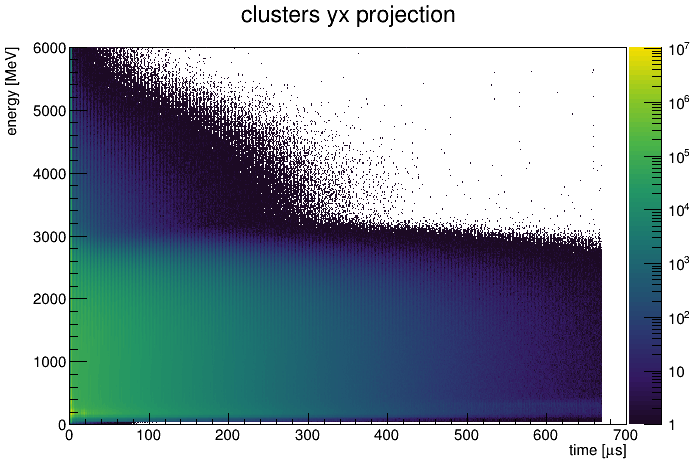

In [7]:
caloNum = 0
Ninitial = GetTH2FromTH3(clusters, caloNum)
Ninitial.Rebin2D(1,1)

c = r.TCanvas()
Ninitial.Draw("colz")
c.SetLogz()
c.Draw()

In [8]:
pileupCorrector = PileupCorrector(Ninitial, "6binning", 0, 2, 1)

In [9]:
pileupCorrector.ComputeRhoDouble()

Computing rho_double histogram
     1 / 28153
     2 / 28153
     3 / 28153
     4 / 28153
     5 / 28153
     6 / 28153
     7 / 28153
     8 / 28153
     9 / 28153
     10 / 28153
     11 / 28153
     12 / 28153
     13 / 28153
     14 / 28153
     15 / 28153
     16 / 28153
     17 / 28153
     18 / 28153
     19 / 28153
     20 / 28153
     21 / 28153
     22 / 28153
     23 / 28153
     24 / 28153
     25 / 28153
     26 / 28153
     27 / 28153
     28 / 28153
     29 / 28153
     30 / 28153
     31 / 28153
     32 / 28153
     33 / 28153
     34 / 28153
     35 / 28153
     36 / 28153
     37 / 28153
     38 / 28153
     39 / 28153
     40 / 28153
     41 / 28153
     42 / 28153
     43 / 28153
     44 / 28153
     45 / 28153
     46 / 28153
     47 / 28153
     48 / 28153
     49 / 28153
     50 / 28153
     51 / 28153
     52 / 28153
     53 / 28153
     54 / 28153
     55 / 28153
     56 / 28153
     57 / 28153
     58 / 28153
     59 / 28153
     60 / 28153
     61 / 28153
  

In [10]:
pileupCorrector.ComputeDoubleCorrection()
pileupCorrector.FitDoublePileupAndApplyCorrection()

Computing double pileup correction
     1 / 28153
     2 / 28153
     3 / 28153
     4 / 28153
     5 / 28153
     6 / 28153
     7 / 28153
     8 / 28153
     9 / 28153
     10 / 28153
     11 / 28153
     12 / 28153
     13 / 28153
     14 / 28153
     15 / 28153
     16 / 28153
     17 / 28153
     18 / 28153
     19 / 28153
     20 / 28153
     21 / 28153
     22 / 28153
     23 / 28153
     24 / 28153
     25 / 28153
     26 / 28153
     27 / 28153
     28 / 28153
     29 / 28153
     30 / 28153
     31 / 28153
     32 / 28153
     33 / 28153
     34 / 28153
     35 / 28153
     36 / 28153
     37 / 28153
     38 / 28153
     39 / 28153
     40 / 28153
     41 / 28153
     42 / 28153
     43 / 28153
     44 / 28153
     45 / 28153
     46 / 28153
     47 / 28153
     48 / 28153
     49 / 28153
     50 / 28153
     51 / 28153
     52 / 28153
     53 / 28153
     54 / 28153
     55 / 28153
     56 / 28153
     57 / 28153
     58 / 28153
     59 / 28153
     60 / 28153
     61 / 2815

In [11]:
DumpClass(pileupCorrector)

Dumping:  <pileup_correction.PileupCorrector object at 0x7f698d6bfda0>
Class:  <class 'pileup_correction.PileupCorrector'>
    h = <ROOT.TH2D object ("N_initial_0_6binning") at 0x7fffda5af390>
    pileupFitEbinLow = 2
    tFitLow = 30
    pileupFitEbinHigh = -1
    h_y = <ROOT.TH1D object ("h_y") at 0x7fffda66fa70>
    name = 6binning
    iteration = 0
    deltat = 2
    Nfills = None
    effectiveDeltaT = None
    verbosity = 1
    fitOptions = R
    rhoDouble = <ROOT.TH2D object ("h_rhoDouble_0_6binning") at 0x7fffda680c40>
    doublePileup = <ROOT.TH2D object ("DoublePileup_0_6binning") at 0x7fffda684e70>
    doublePileupY = <ROOT.TH1D object ("doublePileupY") at 0x7fffda6c0930>
    doublePileupOnlyScaleFactor = 1.9564834178215758e-09
    h_doublePileupCorrected = <ROOT.TH2D object ("h_doublePileupCorrected") at 0x7fffda8b13b0>


In [12]:
print(pileupCorrector)

In [13]:
print("Starting...")

SaveToRootFile(pileupCorrector, "PileupCorrection_TruncIslands")

print("Ending...")

Starting...
Saving class <pileup_correction.PileupCorrector object at 0x7f698d6bfda0>  to file  PileupCorrection_TruncIslands_2020_03_04_09_43_48.root
Ending...


In [ ]:
pileupCorrector.ComputeTripleCorrection()
pileupCorrector.FitTriplePileupAndApplyCorrection()

Starting triple correction
1 / 28153
2 / 28153
3 / 28153
4 / 28153
5 / 28153
6 / 28153
7 / 28153
8 / 28153
9 / 28153
10 / 28153
11 / 28153
12 / 28153
13 / 28153
14 / 28153
15 / 28153
16 / 28153
17 / 28153
18 / 28153
19 / 28153
20 / 28153
21 / 28153
22 / 28153
23 / 28153
24 / 28153
25 / 28153
26 / 28153
27 / 28153
28 / 28153
29 / 28153
30 / 28153
31 / 28153
32 / 28153
33 / 28153
34 / 28153
35 / 28153
36 / 28153
37 / 28153
38 / 28153
39 / 28153
40 / 28153
41 / 28153
42 / 28153
43 / 28153
44 / 28153
45 / 28153
46 / 28153
47 / 28153
48 / 28153
49 / 28153
50 / 28153
51 / 28153
52 / 28153
53 / 28153
54 / 28153
55 / 28153
56 / 28153
57 / 28153
58 / 28153
59 / 28153
60 / 28153
61 / 28153
62 / 28153
63 / 28153
64 / 28153
65 / 28153
66 / 28153
67 / 28153
68 / 28153
69 / 28153
70 / 28153
71 / 28153
72 / 28153
73 / 28153
74 / 28153
75 / 28153
76 / 28153
77 / 28153
78 / 28153
79 / 28153
80 / 28153
81 / 28153
82 / 28153
83 / 28153
84 / 28153
85 / 28153
86 / 28153
87 / 28153
88 / 28153
89 / 28153
90 

In [ ]:
print("Starting...")

SaveToRootFile(pileupCorrector, "PileupCorrection_TruncIslands_WithTriples")

print("Ending...")

In [ ]:
print("All done.")